In [90]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from tcn import compiled_tcn


In [91]:
# following command if getting SSL error while loading the dataset
#!open /Applications/Python\ 3.7/Install\ Certificates.command

In [92]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [93]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [94]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Ankle boot


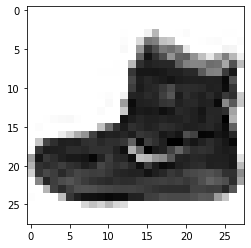

T-shirt/top


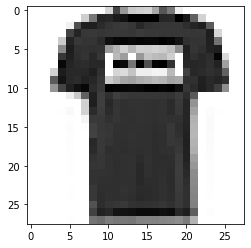

T-shirt/top


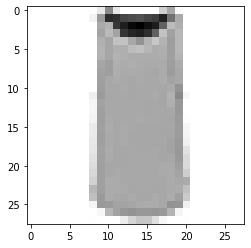

Dress


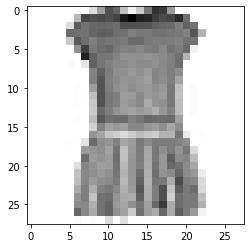

T-shirt/top


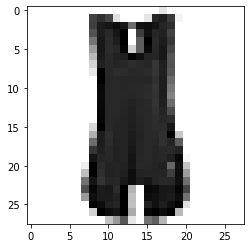

In [95]:
for x in range(5):
    print(class_names[train_labels[x]])
    plt.imshow(train_images[x],cmap=plt.cm.binary)
    plt.show()

In [96]:
#reshaping the image

def reshape(data):
    a = np.zeros(shape=(data.shape[0],(data.shape[1]*data.shape[2])))
    print(a[0])
    print(a.shape)
    for each in range(len(data)):

        a[each] = data[each].flatten
    
    return a
    

In [97]:
temp_train = []
for each in train_images:
 
    temp_train.append(np.array([y for x in each for y in x]))
    
train_data = np.array(temp_train)

In [98]:
temp_test = []
for each in test_images:
 
    temp_test.append(np.array([y for x in each for y in x]))
    
test_data = np.array(temp_test)

In [99]:
train_data[0].shape

(784,)

In [100]:
model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=10,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=train_data[0:1].shape[1],
                         use_skip_connections=True)

x.shape= (None, 20)
model.x = (None, 784, 1)
model.y = (None, 10)


In [101]:
print(f'x_train.shape = {train_images.shape}')
print(f'y_train.shape = {train_labels.shape}')
print(f'x_test.shape = {test_images.shape}')
print(f'y_test.shape = {test_labels.shape}')

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [102]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
tcn (TCN)                    (None, 20)                41320     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 41,530
Trainable params: 41,530
Non-trainable params: 0
_________________________________________________________________


In [103]:
history = model.fit(train_data, train_labels, epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.6058 - accuracy: 0.7955 - val_loss: 0.4268 - val_accuracy: 0.8408
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3990 - accuracy: 0.8541 - val_loss: 0.3771 - val_accuracy: 0.8591
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3689 - accuracy: 0.8626 - val_loss: 0.3538 - val_accuracy: 0.8669
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3481 - accuracy: 0.8715 - val_loss: 0.3372 - val_accuracy: 0.8739
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3356 - accuracy: 0.8762 - val_loss: 0.3469 - val_accuracy: 0.8722
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3230 - accuracy: 0.8807 - val_loss: 0.3261 - val_accuracy: 0.8792
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3192 - accuracy: 0.8824 - val_loss: 0.3256 -

In [104]:
def predict(model,image):

  accuracy = max(model.predict(image.reshape(1,784))[0])*100
  pc = model.predict(image.reshape(1,784)).argmax(-1)[0]
  name = class_names[pc]

  print(pc,name," accuracy:", accuracy,"%")
  plt.imshow(image,cmap=plt.cm.binary)
  plt.show()

9 Ankle boot  accuracy: 99.36659932136536 %


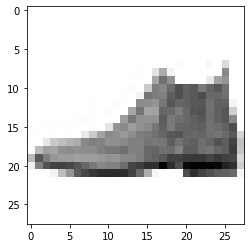

2 Pullover  accuracy: 96.15830183029175 %


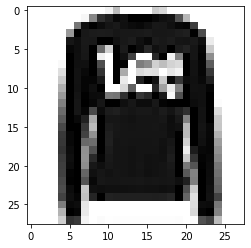

1 Trouser  accuracy: 100.0 %


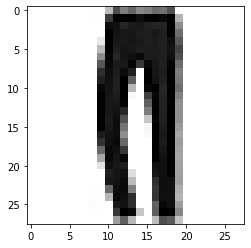

1 Trouser  accuracy: 100.0 %


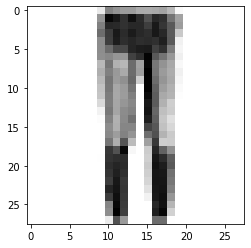

6 Shirt  accuracy: 83.48394632339478 %


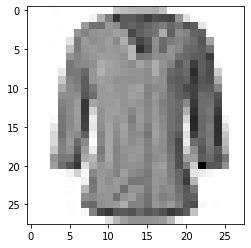

1 Trouser  accuracy: 99.99992847442627 %


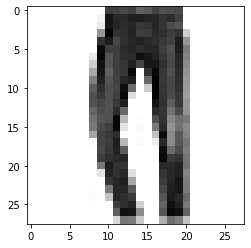

4 Coat  accuracy: 81.1627447605133 %


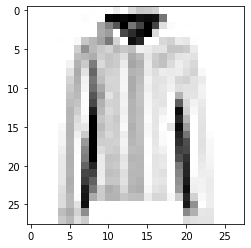

6 Shirt  accuracy: 99.52526092529297 %


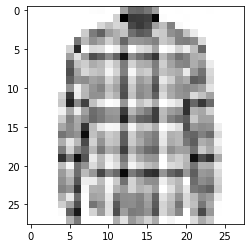

5 Sandal  accuracy: 99.99687671661377 %


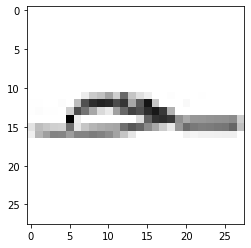

7 Sneaker  accuracy: 99.99369382858276 %


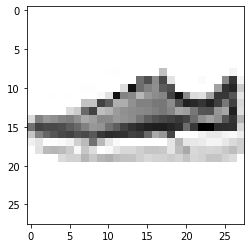

4 Coat  accuracy: 93.09673309326172 %


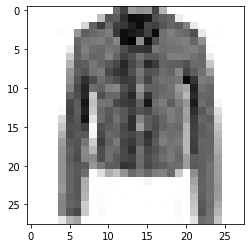

5 Sandal  accuracy: 99.99747276306152 %


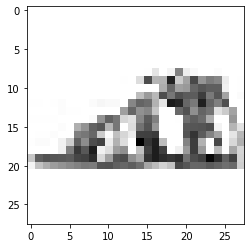

7 Sneaker  accuracy: 89.69467282295227 %


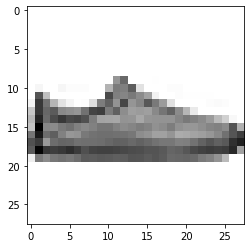

3 Dress  accuracy: 99.96953010559082 %


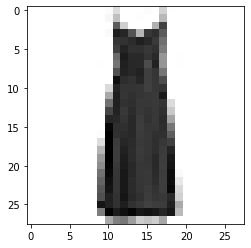

4 Coat  accuracy: 85.42823791503906 %


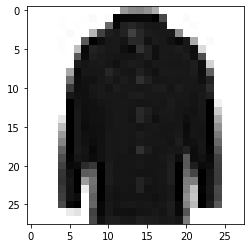

1 Trouser  accuracy: 100.0 %


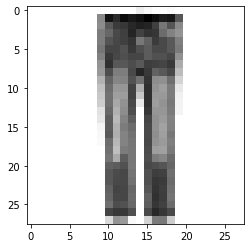

2 Pullover  accuracy: 98.60866069793701 %


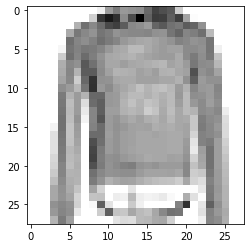

4 Coat  accuracy: 81.71952366828918 %


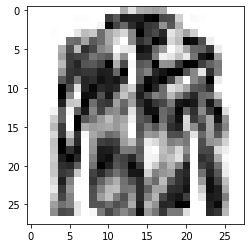

8 Bag  accuracy: 99.99439716339111 %


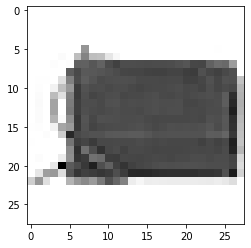

0 T-shirt/top  accuracy: 77.81037092208862 %


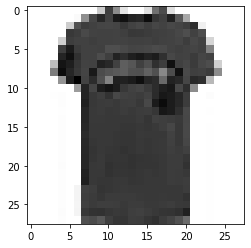

2 Pullover  accuracy: 95.1788604259491 %


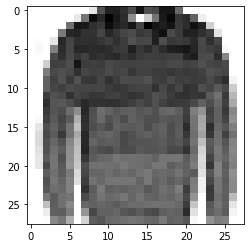

7 Sneaker  accuracy: 76.22292041778564 %


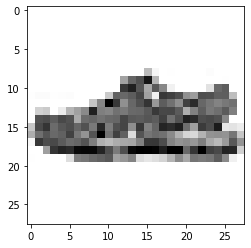

7 Sneaker  accuracy: 99.98797178268433 %


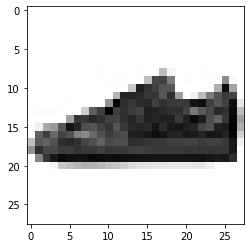

5 Sandal  accuracy: 94.149249792099 %


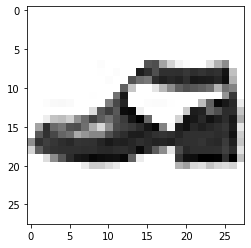

1 Trouser  accuracy: 100.0 %


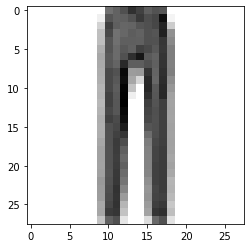

6 Shirt  accuracy: 45.62223553657532 %


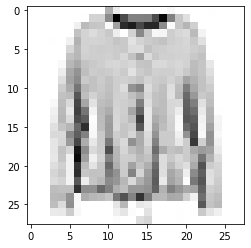

6 Shirt  accuracy: 80.36031723022461 %


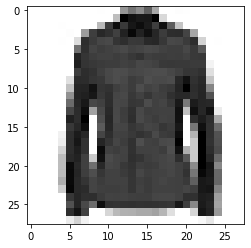

0 T-shirt/top  accuracy: 72.40869402885437 %


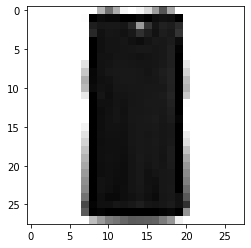

9 Ankle boot  accuracy: 99.0687906742096 %


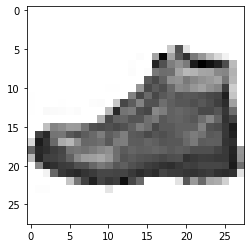

3 Dress  accuracy: 70.10707259178162 %


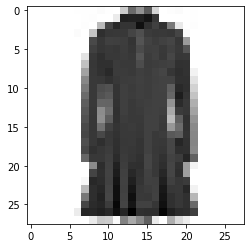

In [105]:
for x in test_images[:30]:
  predict(model,x)

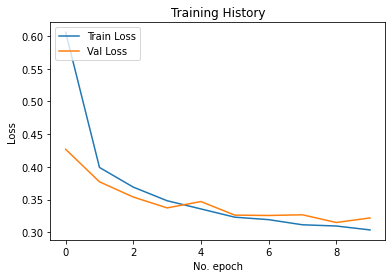

In [109]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

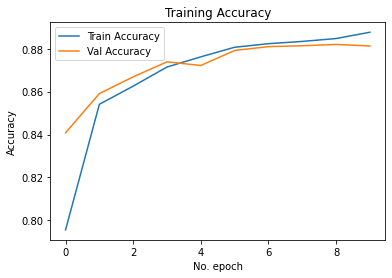

In [114]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [121]:
print("Model's training and validation accuracys are {0}% and {1}% respectively".format(history.history['accuracy'][-1]*100,history.history['val_accuracy'][-1]*100))

Model's training and validation accuracys are 88.77000212669373% and 88.12999725341797% respectively
